Clustering With K-means

In [15]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
%matplotlib inline

Here, we are using iris dataset from scikit learn module. 
It consists of feature like sepal length (cm),sepal width (cm),petal length (cm) &petal width (cm).
Today we are just going to cluster about petals so we need to drop columns with information sepals.

In [2]:
# loading the dataset
irisds = load_iris()    # I was not getting the datasets so I saw a tutorial on it.

# Converting to dataframe
isdf = pd.DataFrame(irisds.data , columns=irisds.feature_names)
isdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# As mentioned in the excercise dropping columns
isdf.drop(["sepal length (cm)","sepal width (cm)"], inplace=True, axis= "columns")

In [16]:
isdf.head()

,petal length (cm),petal width (cm),Cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


HOW DOES CLUSTERING WORKS?

Clustering starts with initializing how many cluster / groups you want to create.
Relate with "Birds of a feather flock together".
The argument n_clusters define number of clusters you want to create .
Now, the algorithm first chose fixed number of points mentioned in n_clusters.
Proceeds with selecting a points and caluclating the distance of that point from each selected point.
Then , we assign it to the group with least distance from it.

In [5]:
# Clustering for the given data points

kmean = KMeans(n_clusters=3)
y_predict = kmean.fit_predict(isdf)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
isdf["Cluster"] = y_predict

In [7]:
isdf.head()

,petal length (cm),petal width (cm),Cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [9]:
isdf.columns

Index(['petal length (cm)', 'petal width (cm)', 'Cluster'], dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


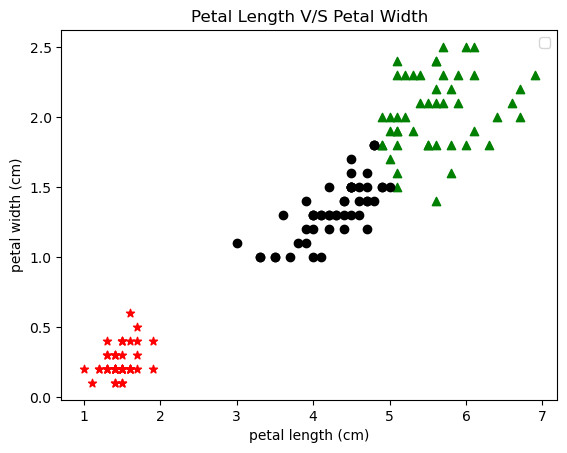

In [10]:
# Define a new daatframe for each particular cluster
pet1 = isdf[isdf["Cluster"]==0]
pet2 = isdf[isdf["Cluster"]==1]
pet3 = isdf[isdf["Cluster"]==2]

# Plotting a scatter plot for a given data points

plt.scatter(pet1['petal length (cm)'],pet1['petal width (cm)'],color="red",marker="*")
plt.scatter(pet2['petal length (cm)'],pet2['petal width (cm)'],color="green",marker="^")
plt.scatter(pet3['petal length (cm)'],pet3['petal width (cm)'],color="black")

# Customizing the plot
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title("Petal Length V/S Petal Width")
plt.legend()

In [11]:
# C-ordinates of the centroids of the following data points
kmean.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

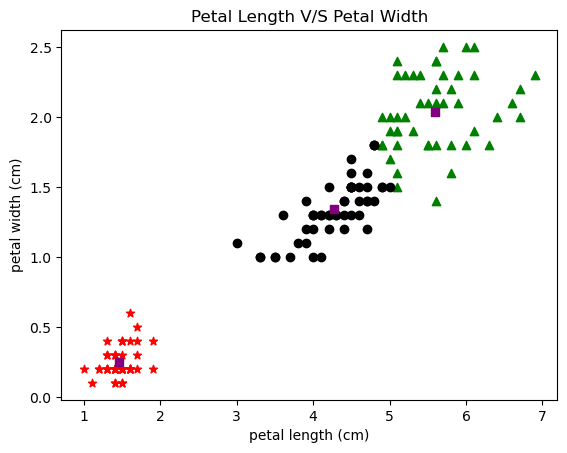

In [12]:
# Again plotting
plt.scatter(pet1['petal length (cm)'],pet1['petal width (cm)'],color="red",marker="*")
plt.scatter(pet2['petal length (cm)'],pet2['petal width (cm)'],color="green",marker="^")
plt.scatter(pet3['petal length (cm)'],pet3['petal width (cm)'],color="black")

# Customizing the plot
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title("Petal Length V/S Petal Width")

# Plotting the centroids
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],color="purple",marker="s")

# Now the locating the centroids in the succeding scatter plot

In [13]:
# Elbow-point finding 
k_inp = range(1,10)
sse = []
for i in k_inp:
    kmean = KMeans(n_clusters=i)
    kmean.fit(isdf[['petal length (cm)','petal width (cm)']])
    sse.append(kmean.inertia_)
    
# print sse
sse

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[550.8953333333333,
 86.39021984551395,
 31.371358974358976,
 19.465989010989013,
 13.91690875790876,
 11.036333877751726,
 9.241242581090406,
 7.669666305916306,
 6.64670473970474]

Text(0, 0.5, 'SSE')

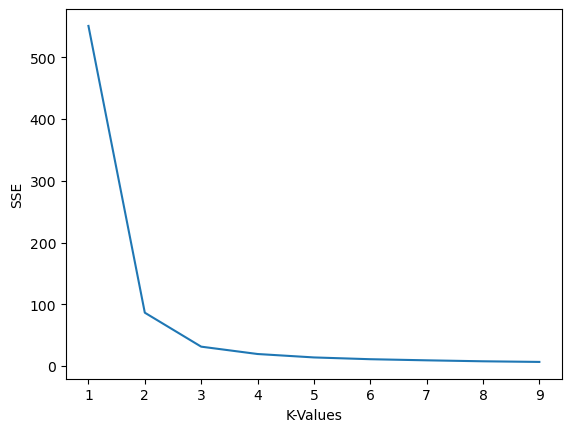

In [14]:
# plotting sse v/s k-value to the elbow point
plt.plot(k_inp ,sse )
plt.xlabel("K-Values")
plt.ylabel("SSE")